In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
#For deep learning
from keras import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense


Using TensorFlow backend.


In [2]:
df=pd.read_csv('NSE-TATAGLOBAL.csv')
df.shape #To display the dimension of the dataset
df=df[::-1]#To reverse the datatset inorder to display the data from oldest to newest
df=df.reset_index(drop=True)#Resteting the index for the above funcionality to include
df.head(5)#To display the first 5 rows of the dataset

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [3]:
#df.iloc[index range,index range]The 1st index range is row index range,2nd indx range is the column index range
open_price=df.iloc[:,1:2]
open_price

,Open
0,122.10
1,120.30
2,121.80
3,120.10
4,117.60
...,...
2030,233.55
2031,233.30
2032,240.00
2033,234.55


In [4]:
train_set=open_price[:2000].values #display the values from 1st-2000th row
train_set

array([[122.1 ],
       [120.3 ],
       [121.8 ],
       ...,
       [232.5 ],
       [236.  ],
       [235.15]])

In [5]:
test_set=open_price[2000:].values#display the values from 2000th row,to the end.
test_set

array([[241.  ],
       [237.25],
       [236.65],
       [237.3 ],
       [233.  ],
       [235.  ],
       [236.05],
       [240.8 ],
       [244.  ],
       [246.9 ],
       [240.3 ],
       [234.5 ],
       [231.8 ],
       [237.  ],
       [233.85],
       [235.35],
       [237.  ],
       [236.  ],
       [238.2 ],
       [222.  ],
       [224.  ],
       [221.  ],
       [222.5 ],
       [222.5 ],
       [216.35],
       [223.45],
       [233.15],
       [237.9 ],
       [235.95],
       [235.  ],
       [233.55],
       [233.3 ],
       [240.  ],
       [234.55],
       [234.05]])

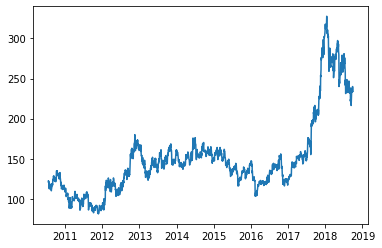

In [6]:
dates = pd.to_datetime(df['Date'])#conversion of data into datetime format
plt.plot_date(dates, open_price,fmt='-')#plotting the graph(x-axis,y-axis,type of symbol used for plotting)
plt.savefig("test1final.png")#saving the image

In [7]:
#Using the MinMaxScaler() the training dsatset is scaled to 0-1 as all the algorithns work better when in the same scale
sc=MinMaxScaler()
train_set_scaled=sc.fit_transform(train_set)

In [8]:
#making the data ready for RNN model.We make use of the sequence value=60(i.e;the previous 60 values will determine the further outcome and not the complete dataset)
#then we have shaped our dataset as per the requirement using numpy array
x_train = []
y_train = []
for i in range(60,2000):
    x_train.append(train_set_scaled[i-60:i,0])
    y_train.append(train_set_scaled[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1940, 60, 1)

In [9]:
#$ LSTM layers along with 1 dense layer is implemented.Dropout() is used to prevent data overfitting(In this case 20%)of the data is prevented
reg = Sequential()
reg.add(LSTM(units = 50,return_sequences=True,input_shape=(x_train.shape[1],1)))
reg.add(Dropout(0.2))
reg.add(LSTM(units = 50,return_sequences=True))
reg.add(Dropout(0.2))
reg.add(LSTM(units = 50,return_sequences=True))
reg.add(Dropout(0.2))
reg.add(LSTM(units=50))
reg.add(Dropout(0.2))
reg.add(Dense(units=1))
reg.compile(optimizer = 'adam',loss='mean_squared_error')
reg.fit(x_train,y_train, epochs=2, batch_size =1,verbose=2)

Epoch 1/2
 - 946s - loss: 0.0053
Epoch 2/2
 - 997s - loss: 0.0036


In [13]:
input = open_price[len(open_price)-len(test_set)-60:].values
input.shape
input = sc.transform(input)

In [14]:
x_test = []
for i in range(60,95):
    x_test.append(input[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(35, 60, 1)

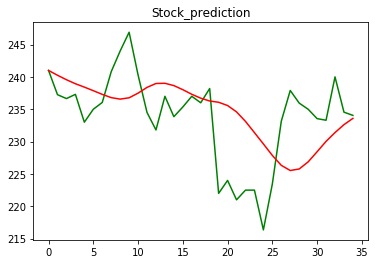

In [15]:
pred = reg.predict(x_test)
pred = sc.inverse_transform(pred)
plt.plot(test_set,color='green')
plt.plot(pred,color='red')
plt.title('Stock_prediction')
plt.show()